In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import multivariate_normal, norm, uniform

import pymc3 as pm

In [2]:
N = 100

height    = norm.rvs(size=N, loc=10, scale=2)
leg_prop  = uniform.rvs(size=N, loc=0.4, scale=0.1)
leg_left  = leg_prop * height + norm.rvs(size=N, loc=0, scale=0.02)
leg_right = leg_prop * height + norm.rvs(size=N, loc=0, scale=0.02)

In [3]:
with pm.Model() as categorical_model:
    alpha  = pm.Normal('alpha', mu=10, sd=100)
    beta_l = pm.Normal('beta_l', mu=2, sigma=10)
    beta_r = pm.Normal('beta_r', mu=2, sigma=10)
    sigma  = pm.Exponential('sigma', lam=1)
    h      = pm.Normal('height', mu=alpha + beta_l*leg_left + beta_r*leg_right, sd=sigma, observed=height)
    
    par_post = pm.find_MAP()
    hessian  = pm.find_hessian(par_post, vars=[alpha, beta_l, beta_r, sigma])

In [4]:
posterior_sample = multivariate_normal.rvs(size=10**4,
                        mean=np.array([par_post['alpha'], par_post['beta_l'], par_post['beta_r'], par_post['sigma']]),
                        cov=np.linalg.inv(hessian))

In [5]:
posterior_sample = pd.DataFrame(posterior_sample, columns=['alpha', 'beta_l', 'beta_r', 'sigma'])

In [6]:
posterior_sample.describe()

,alpha,beta_l,beta_r,sigma
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.934646,4.948505,-2.928547,0.629207
std,0.327944,1.921311,1.916879,0.045058
min,-0.300491,-2.712100,-10.284798,0.470036
25%,0.712776,3.638403,-4.228102,0.599031
50%,0.937057,4.957623,-2.936053,0.628781
75%,1.155146,6.244100,-1.622103,0.659427
max,2.253549,12.267583,4.686718,0.798690


/home/dmitri/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='beta_l', ylabel='beta_r'>

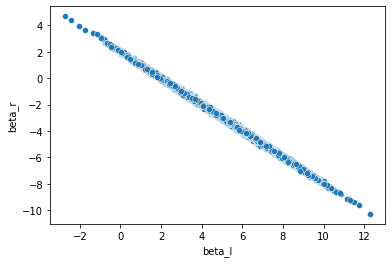

In [7]:
sns.scatterplot(posterior_sample['beta_l'],posterior_sample['beta_r'])

/home/dmitri/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

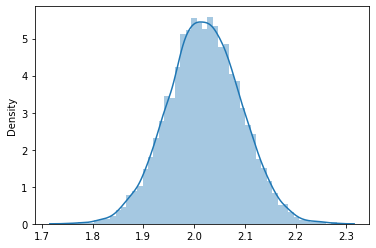

In [8]:
sns.distplot(posterior_sample['beta_l']+posterior_sample['beta_r'])

In [9]:
np.std(posterior_sample['beta_l']+posterior_sample['beta_r'])

0.0716128810362003

In [10]:
with pm.Model() as categorical_model:
    alpha  = pm.Normal('alpha', mu=10, sd=100)
    beta   = pm.Normal('beta', mu=2, sigma=10)
    sigma  = pm.Exponential('sigma', lam=1)
    leg    = pm.Normal('leg', mu=alpha + beta*leg_left, sd=sigma, observed=leg_right)
    
    par_post = pm.find_MAP()

In [13]:
np.round(par_post['beta'], 2)

1.0